# CNN for Cats vs Dog image Classification
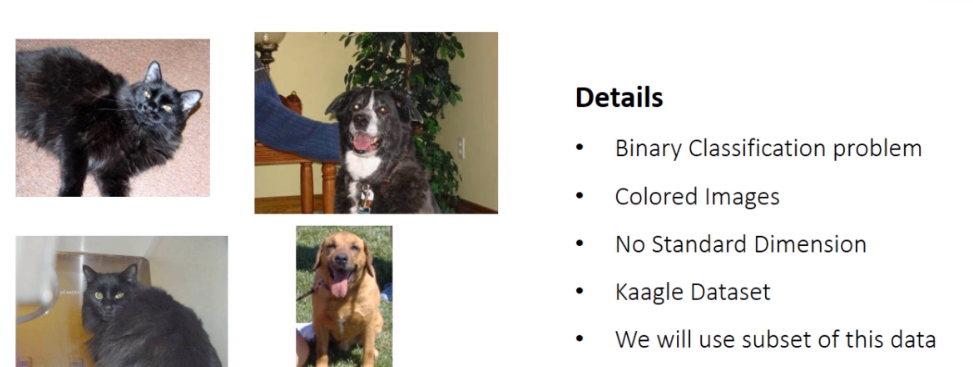

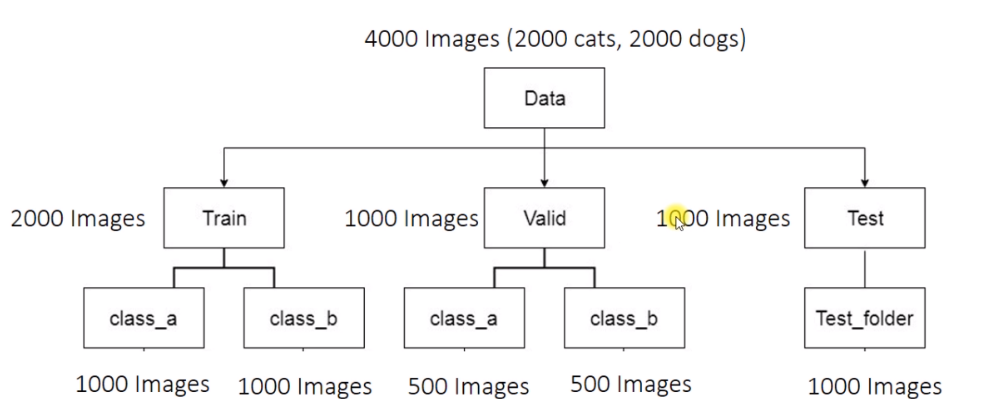

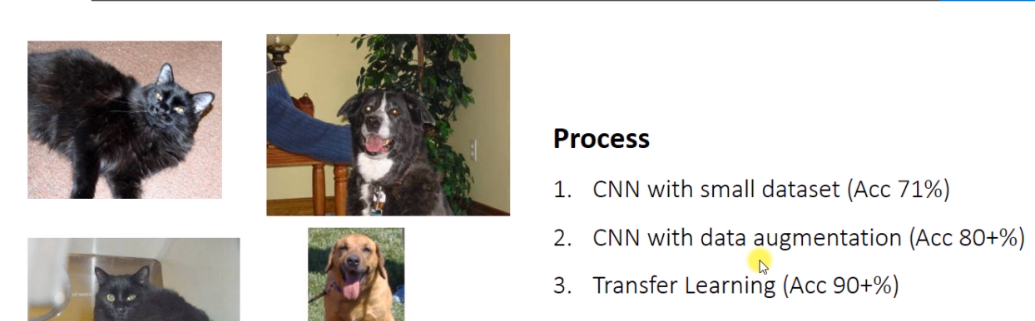

Data augmentation : ?
Transformation : zoom in & zoom out ,rotation , linear trans etc

In [21]:
train_dir = r'C:\Users\Rakshu\Desktop\Pyt\cats_and_dogs_small\train'
val_dir =  r'C:\Users\Rakshu\Desktop\Pyt\cats_and_dogs_small\validation'
test_dir =  r'C:\Users\Rakshu\Desktop\Pyt\cats_and_dogs_small\test'

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data Processing from ImageDataGenerator

* Read the pictures
* Decode the JPEG content to RGB grids of pixels
* COnevrt these into floating point tensors
* REscale the pixel values(between 0 and 255) to the [0,1] interval

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
#Generateing the batches of tensor image data
#FOr  augmented data we can use diff param from ImageDataGenerator
train_datagen =ImageDataGenerator(rescale  = 1./255) #rescale the image
test_datagen  = ImageDataGenerator(rescale = 1./255)

#target_size : The dimensions to which all images found will be resized.
#To fetch data from a directory/folder
#Output of train_gen is in the form of X and Y
#goin init train direc , resing to (150,150),feeding images in a batch of 20
#since two folders n classififcation prob give 'binary'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150), #converting all i/p image to size(150,150)
    batch_size  =20,
    class_mode = 'binary')

#validation data : 
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size =(150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models

* Conv layer with 32 filters , window_size = (3,3)
* input size is 150,150 as mentioned in target_size 
* since coloured image channel=3
* ===========================================
* With each Conv layer we should double the number f Fiters we use
* =============================================
* In MaxPooling we are reducing the size of i/p images (srinking) from 150 to 75  by (2,2) 
* Post 1st MaxPooling image size : (75,75)
* Post 2nd MaxPooling image size : (37,37) later (18,18 ) n last (9,9)
* =======================================
* As we go down d network : Number of Features increasing  , image size has been decreasing
* i,e Image size should decrease with each Conv layer and Feature map height should increase along d network

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32 ,(3,3) ,activation='relu',
                      input_shape = (150 ,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512 ,activation='relu')) #fully connected ANN
model.add(layers.Dense(1,activation ='sigmoid')) # fully connected ANN output layer


In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

# Compile Model

In [28]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy' ,
              optimizer = optimizers.RMSprop(lr=1e-4),  # 'sgd'
             metrics =['acc'])
    


### SInce we have used ImageDataGenerator to generate data in batches. We are using 
### model.fit_generator

In [29]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch =100 ,  # since batch_size =20 ,train_data=2000 images hence steps =2000/20
    epochs =20,
    validation_data =validation_generator,
    validation_steps =50)

Epoch 1/20
100/100 [==============================] - 176s 2s/step - loss: 0.6857 - acc: 0.5535 - val_loss: 0.7541 - val_acc: 0.5080
Epoch 2/20
100/100 [==============================] - 189s 2s/step - loss: 0.6646 - acc: 0.6040 - val_loss: 0.6398 - val_acc: 0.6400
Epoch 3/20
100/100 [==============================] - 183s 2s/step - loss: 0.6182 - acc: 0.6575 - val_loss: 0.6077 - val_acc: 0.6660
Epoch 4/20
100/100 [==============================] - 178s 2s/step - loss: 0.5749 - acc: 0.6915 - val_loss: 0.6060 - val_acc: 0.6630
Epoch 5/20
100/100 [==============================] - 183s 2s/step - loss: 0.5465 - acc: 0.7080 - val_loss: 0.6240 - val_acc: 0.6510
Epoch 6/20
100/100 [==============================] - 185s 2s/step - loss: 0.5158 - acc: 0.7355 - val_loss: 0.6071 - val_acc: 0.6740
Epoch 7/20
100/100 [==============================] - 190s 2s/step - loss: 0.4841 - acc: 0.7695 - val_loss: 0.5946 - val_acc: 0.6910
Epoch 8/20
100/100 [==============================] - 190s 2s/step - 

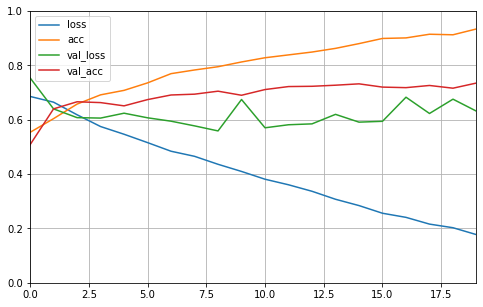

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.save("model.h5")

In [36]:
from tensorflow.keras import backend as K

K.clear_session()
#del model

# Data Augmenation to create dummy date n prevent overfitting

# Avoid Overfitting by image Preprocessing
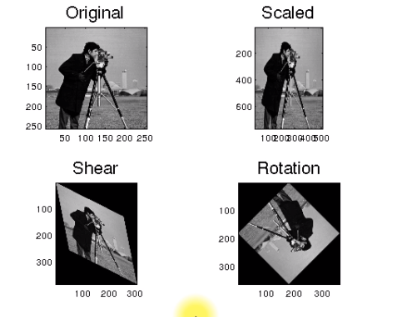


Shear : conevrt square into rombus
We shoud apply above image preoccessing to randomly apply to images

In [37]:
train_datagen = ImageDataGenerator(
    rescale =1./255,
    rotation_range =40,        #this is upper limit value
    width_shift_range =0.2 ,   #this is upper limit value
    height_shift_range =0.2,   #this is upper limit value
    shear_range =0.2,
    zoom_range =0.2,
    horizontal_flip =True )

test_datagen =ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150,150),
    batch_size =32,
    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir ,
    target_size =(150,150),
    batch_size=32,
    class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
model = models.Sequential()

model.add(layers.Conv2D(32 ,(3,3) ,activation='relu',
                      input_shape = (150 ,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))  #decativate 50% of random neurons during each epoch
# Drop out Effective layer to avoid overfitting 

model.add(layers.Dense(512 ,activation='relu')) #fully connected ANN
model.add(layers.Dense(1,activation ='sigmoid')) # fully connected ANN output layer


In [40]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy' ,
              optimizer = optimizers.RMSprop(lr=1e-4),  # 'sgd'
             metrics =['acc'])
    


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch =100 ,  # since batch_size =32 ,train_data=3200 images hence steps =2000/20
    epochs =100,
    validation_data =validation_generator,
    validation_steps =50)

Epoch 1/100
100/100 [==============================] - 269s 3s/step - loss: 0.6896 - acc: 0.5331 - val_loss: 0.6722 - val_acc: 0.6015
Epoch 2/100
100/100 [==============================] - 1137s 11s/step - loss: 0.6800 - acc: 0.5562 - val_loss: 0.6739 - val_acc: 0.5425
Epoch 3/100
100/100 [==============================] - 262s 3s/step - loss: 0.6685 - acc: 0.5900 - val_loss: 0.6399 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 286s 3s/step - loss: 0.6555 - acc: 0.6114 - val_loss: 0.6491 - val_acc: 0.5882
Epoch 5/100
100/100 [==============================] - 305s 3s/step - loss: 0.6341 - acc: 0.6291 - val_loss: 0.6162 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 311s 3s/step - loss: 0.6201 - acc: 0.6531 - val_loss: 0.5927 - val_acc: 0.6751
Epoch 7/100
100/100 [==============================] - 314s 3s/step - loss: 0.6035 - acc: 0.6800 - val_loss: 0.5854 - val_acc: 0.6846
Epoch 8/100
100/100 [==============================] - 304s 

Train accu n Val accu moves together no evidence of over fitting , if we run for more epoch it may converge

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("model_final.h5")

# Use VGG16 model ARchitecture to improve the accuracy

VGG16 (Pre-trained model) : Categorise millions of images into 1000 categories

In [ ]:
from tensorflow.keras.preprocessing import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale =1./255,
    rotation_range =40,        #this is upper limit value
    width_shift_range =0.2 ,   #this is upper limit value
    height_shift_range =0.2,   #this is upper limit value
    shear_range =0.2,
    zoom_range =0.2,
    horizontal_flip =True )

test_datagen =ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150,150),
    batch_size =20,
    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir ,
    target_size =(150,150),
    batch_size=20,
    class_mode ='binary')

In [ ]:
from tensorflow.keras.application import VGG16

conv_base = VGG16(weight ='imagenet', #to fetch pre-trained model weight
                 include_top=False, #to import whole model set to True since v importing only conv_base it s F
                 input_shape=(150,150,3))

In [ ]:
conv_base.summary()

In [ ]:
model =models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

We are using optimized weights of VGG16 layer ,if we dont want train that weights we can freeze d layer by below setting.
First trainable parametr set=0 , we can reducce the trainable param n increase speed


In [ ]:
#conv_base.trianable =False  

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy' ,
              optimizer = optimizers.RMSprop(lr=1e-5), #We wanna fine tune our already trained model we r using smaller LR
    


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch =100 ,  # since batch_size =32 ,train_data=3200 images hence steps =2000/20
    epochs =100,
    validation_data =validation_generator,
    validation_steps =50
    callbacks =[checkpoint_cb]) #save model after each epoch

We can achieve the accuracy of 98% for training and validation

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluate model for Test data

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

In [ ]:
model.evaluate_generator(test_generator ,steps=50)
#loss ,accuracy